
# Four layered Bragg fiber exact fields

Corresponds to N2 configuration in paper by Bird.

In [39]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf, plotlogf_real
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


In [65]:
ts = [15*1e-6, .42*1e-6, 15*1e-6, .42*1e-6, 5e-6]
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass, lambda x:n_air]
mats = ['air', 'glass', 'air', 'glass','air']

In [66]:
A = BraggExact(ts=ts,ns=ns, mats=mats, maxhs=[.2,.015,.07,.015, .5], wl=.6e-6)


In [67]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [55]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

157.12317044127943

In [56]:
outer = 'h2'
nu = 1

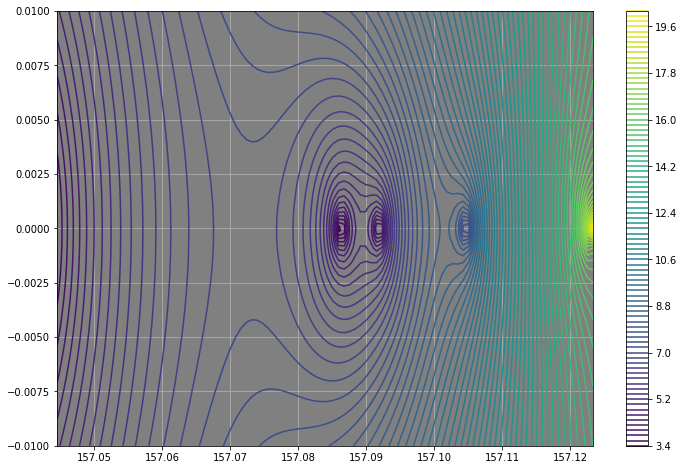

In [57]:
%matplotlib inline
plotlogf(A.determinant, .9995*k_low, 1.000001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100)

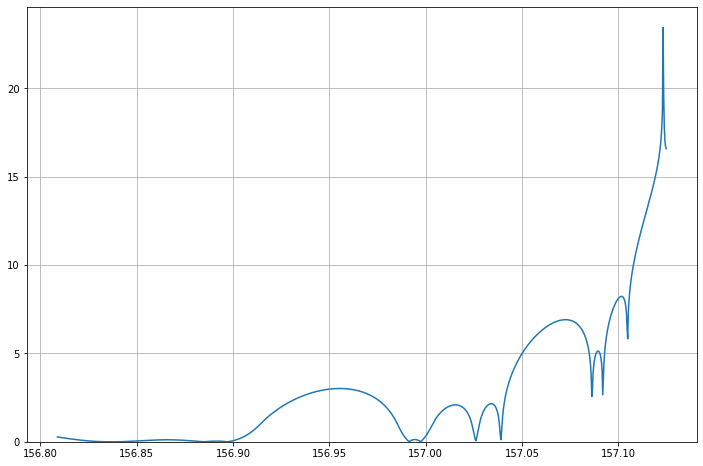

In [58]:
plotlogf_real(A.determinant, .998*k_low, 1.00001*k_low, nu, outer)

In [59]:
xs = np.linspace(.998 * k_low, 1.00001 * k_low, 3000)
ys = np.abs(A.determinant(xs, nu, outer))

In [60]:
indx = np.argmin(ys)

In [61]:
xs[indx]

156.88442966876795

In [62]:
guess = np.array(.9999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (157.104718553244-1.4559564965519194e-08j) . Residual of determinant:  8.392055337081568e-08


# Bragg Exact Fields

In [63]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [64]:
Draw(1e0*Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Ephi'].imag, A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)

## Hybrid Transverse fields

In [38]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# TE/TM fields

In [ ]:
outer = 'h2'
nu = 0

In [ ]:
plotlogf(A.determinant, .995*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [ ]:
guess = np.array(.999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


# Bragg Exact Fields

In [ ]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

## Transverse fields

In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# Appears beta with higher real part was TM, now for TE

In [ ]:
outer = 'h2'
nu = 0

In [ ]:
plotlogf(A.determinant, .995*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [ ]:
guess = np.array(.997*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


# Bragg Exact Fields

In [ ]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

## Transverse fields

## Etv

In [ ]:
Draw(Fs['Etv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})

## Htv

In [ ]:
Draw(Fs['Htv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})